# Chicago Violent Crime Dataset Project (2015–2020)

The data set includes crimes such as:

- Robbery
- Criminal Sexual Assault
- Homicide
- Kidnapping

We will answer 5 questions about crime trends using Python.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("chicago_crime_2015_2020.csv") #Import the data set

df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

print("First 5 rows of the dataset:") #First 5 rows
print(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

print("\nColumn names:") #The columns
print(df.columns)



First 5 rows of the dataset:
          primary_type                date  arrest  year   latitude  \
0              Robbery 2015-12-05 09:08:00    True  2015  41.690573   
1           Kidnapping 2015-05-25 04:15:00   False  2015  41.776267   
2              Robbery 2015-01-07 11:50:00    True  2015  41.777651   
3  Crim sexual assault 2015-09-21 09:00:00   False  2015  41.751492   
4              Robbery 2015-10-14 01:55:00   False  2015  41.807836   

   longitude                    description  month  
0 -87.700787                     Aggravated     12  
1 -87.760401       Child abduction/stranger      5  
2 -87.783053                     Aggravated      1  
3 -87.586597                 Non-aggravated      9  
4 -87.726481  Armed: other dangerous weapon     10  

Shape of the DataFrame:
(70748, 8)

Column names:
Index(['primary_type', 'date', 'arrest', 'year', 'latitude', 'longitude',
       'description', 'month'],
      dtype='object')


## How has the total number of violent crime incidents changed from 2015 to 2020?

Number of crimes per year:
year
2015    11697
2016    14465
2017    14275
2018    11879
2019     9594
2020     8838
Name: count, dtype: int64


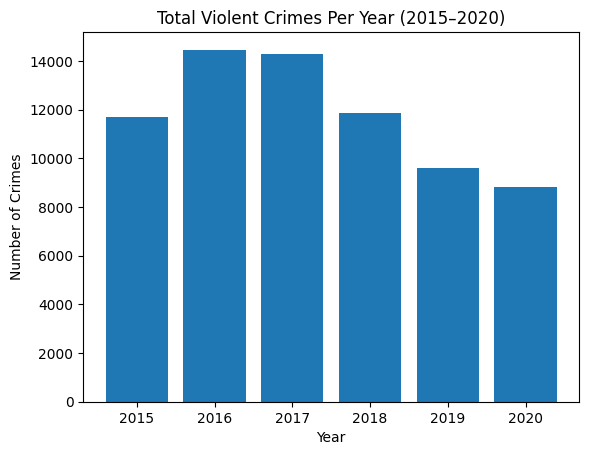

In [8]:

year_counts = df["year"].value_counts().sort_index()

print("Number of crimes per year:")
print(year_counts)

plt.bar(year_counts.index, year_counts.values)
plt.title("Total Violent Crimes Per Year (2015–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


## Which types of violent crimes (Robbery, Homicide, Criminal Sexual Assault, Kidnapping) are most common overall?


Crimes by type:
primary_type
Robbery                59004
Crim sexual assault     6832
Homicide                3866
Kidnapping              1046
Name: count, dtype: int64


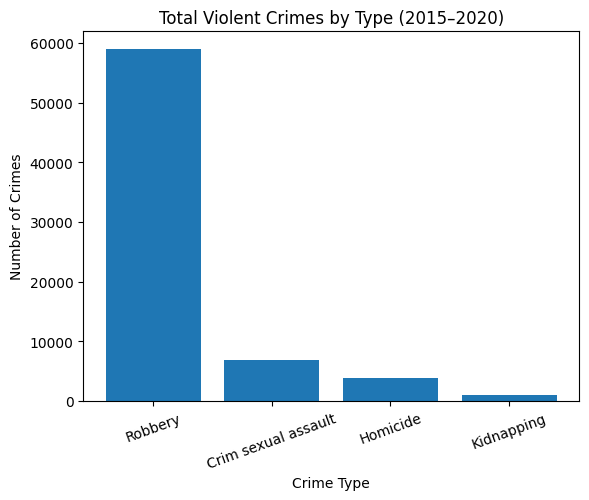

In [9]:

type_counts = df["primary_type"].value_counts() #crimes by type

print("Crimes by type:")
print(type_counts)

plt.bar(type_counts.index, type_counts.values)  #chart of crimes by type
plt.title("Total Violent Crimes by Type (2015–2020)")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=20)
plt.show()


## How do arrest rates differ by crime type?


Arrest rates by crime type (as proportions):
primary_type
Crim sexual assault    0.091920
Homicide               0.364977
Kidnapping             0.073614
Robbery                0.082994
Name: arrest, dtype: float64

Arrest rates by crime type (in %):
primary_type
Crim sexual assault     9.192037
Homicide               36.497672
Kidnapping              7.361377
Robbery                 8.299437
Name: arrest, dtype: float64


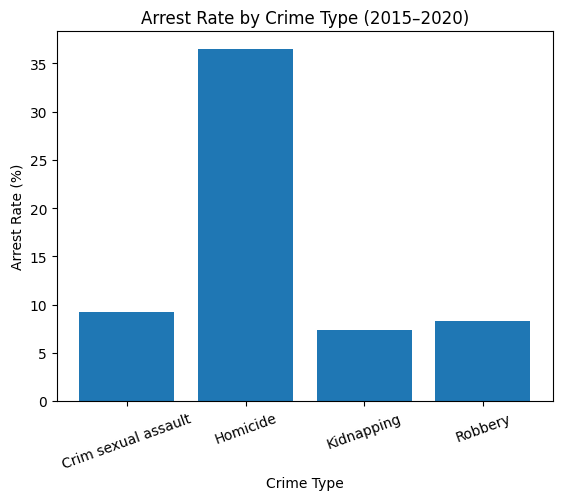

In [ ]:

arrest_rates = df.groupby("primary_type")["arrest"].mean() #The arrest rate by crime type

print("Arrest rates by crime type (as proportions):")
print(arrest_rates)

arrest_rates_percent = arrest_rates * 100
print("\nArrest rates by crime type (in %):") #Convert to percentages
print(arrest_rates_percent)

plt.bar(arrest_rates_percent.index, arrest_rates_percent.values) #Create Bar chart of arrest rates
plt.title("Arrest Rate by Crime Type (2015–2020)")
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=20)
plt.show() 


## Are there any seasonal patterns in violent crime across the months of the year?

Number of crimes per month:
month
1     6183
2     4502
3     4742
4     4944
5     5694
6     5987
7     6622
8     6974
9     6236
10    6507
11    6200
12    6157
Name: count, dtype: int64


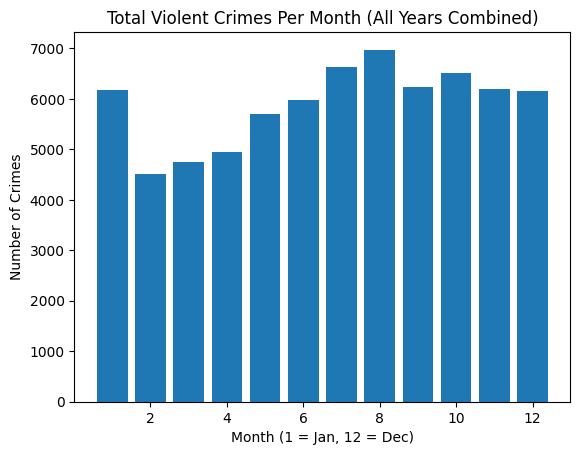

In [11]:

month_counts = df["month"].value_counts().sort_index() #Count the number of crimes per month in all years

print("Number of crimes per month:")
print(month_counts)

plt.bar(month_counts.index, month_counts.values)  #Creates Bar chart of crimes per month
plt.title("Total Violent Crimes Per Month (All Years Combined)")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Number of Crimes")
plt.show()


## Which year had the highest arrest rate for violent crimes?

Arrest rate by year:
year
2015    0.112678
2016    0.098721
2017    0.088757
2018    0.098998
2019    0.099124
2020    0.098778
Name: arrest, dtype: float64

Arrest rate by year (percent):
year
2015    11.267846
2016     9.872105
2017     8.875657
2018     9.899823
2019     9.912445
2020     9.877800
Name: arrest, dtype: float64


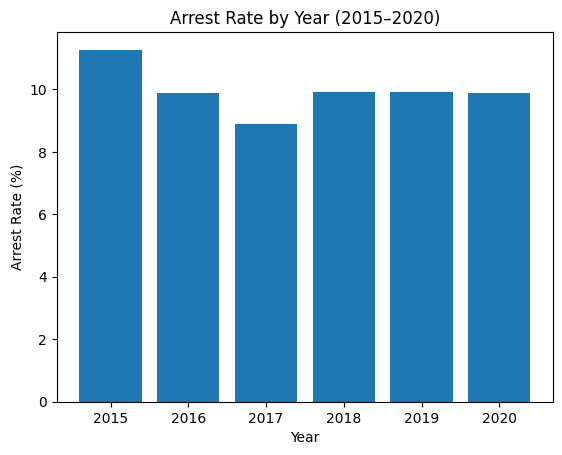

In [12]:

group_by_year = df.groupby("year") #The data grouped by year

arrest_rate_by_year = group_by_year["arrest"].mean() # Calculate the arrest rate for each year

print("Arrest rate by year:")
print(arrest_rate_by_year)

arrest_rate_by_year_percent = arrest_rate_by_year * 100 #Convert to percentages

print("\nArrest rate by year (percent):")
print(arrest_rate_by_year_percent)

plt.bar(arrest_rate_by_year_percent.index, arrest_rate_by_year_percent.values) #Creates the bar chart

plt.title("Arrest Rate by Year (2015–2020)")
plt.xlabel("Year")
plt.ylabel("Arrest Rate (%)")

plt.show()
